### **Sentiment Analysis using Natural Language Processing**

Done by : Gyanjyoti Kalita,  Verzeo September batch

In [76]:
import pandas as pd

Taking the Data and creating a dataframe

In [77]:
 df = pd.read_csv('/content/Restaurant_Reviews.csv',sep = '\t')
 df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [78]:
df.info


<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [79]:
df.shape

(1000, 2)

Analyzing & Visualizing the number of positive and negative Restaurant Reviews (0 stands for negative , 1 stands for positive)

1    500
0    500
Name: Liked, dtype: int64

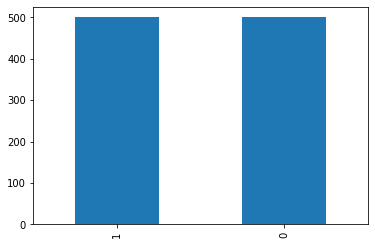

In [80]:
import matplotlib.pyplot as plt 
df['Liked'].value_counts().plot(kind='bar')
df['Liked'].value_counts()

We have a balanced dataset as the number of positive and negative reviews are eqaul

importing necessary libraries

In [81]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [82]:
import nltk
nltk.download('stopwords') 
nltk.download('punkt')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Preprocessing of data and Stemming**

In [83]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
sm = PorterStemmer()

Steps in Preprocessing:
1. getting rid of any characters apart from alphabets.
2. converting the string to lowercase
3. Removing stop words
4. Performing Stemming on each word,i.e. change the different forms of a word into a single item called a lemma.

In [84]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [sm.stem(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [85]:
corpus = text_transformation(df['Review'])

In [86]:
x = corpus
y = df['Liked'].values  

Train Test and split

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

**Using count vectorizer**

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train_vect = cv.fit_transform(x_train)
x_test_vect = cv.transform(x_test)

**Using the Support vector Machine Classifier model**

In [89]:
from sklearn.svm import SVC  
model = SVC()
model.fit(x_train_vect,y_train)

SVC()

Making Pipeline between Count Vectorizer and SVM

In [90]:
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(CountVectorizer(),SVC())

text_model.fit(x_train,y_train)
y_pred = text_model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0])

In [91]:
y_test

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1])

Calculating Model Accuracy score

In [92]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

In [93]:
acc_score = accuracy_score(y_test,y_pred)
pre_score = precision_score(y_test,y_pred)
rec_score = recall_score(y_test,y_pred)
confn_matrix = confusion_matrix(y_test,y_pred)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print('confusion matrix: \n',confn_matrix)
print(classification_report(y_test, y_pred))

Accuracy_score:  0.784
Precision_score:  0.8454545454545455
Recall_score:  0.7153846153846154
confusion matrix: 
 [[103  17]
 [ 37  93]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       120
           1       0.85      0.72      0.78       130

    accuracy                           0.78       250
   macro avg       0.79      0.79      0.78       250
weighted avg       0.79      0.78      0.78       250



Testing random review

In [94]:
testing = text_transformation(['hate the place food sucks'])
text_model.predict(testing)


array([0])

Predict user input sentiment

In [95]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [96]:
def sentiment_predictor(u_in):
  u_in_tran = text_transformation(u_in)
  prediction = text_model.predict(u_in_tran)
  expression_check(prediction)


In [101]:
input1 = []
input1.append(input('enter review :'))
sentiment_predictor(input1)
input1.pop

enter review :very nice food
Input statement has Positive Sentiment.


<function list.pop>